In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [6]:
df=pd.read_csv("C:/Users/AKSHITHA/Downloads/test.csv/test.csv")

In [7]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [11]:
df.shape

(2947, 563)

In [12]:
print("Columns:", df.columns.tolist()[:5], "...")
print("Shape:", df.shape)

X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # labels

print("Unique activities:", y.unique())
print("Activity distribution:\n", y.value_counts())

Columns: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y'] ...
Shape: (2947, 563)
Unique activities: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Activity distribution:
 LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:2]

array([[-0.2777081 , -0.21063123,  2.19307573, ...,  0.62272321,
        -0.0383485 , -1.58082533],
       [ 0.19865964,  0.18259066, -0.25026383, ...,  0.63673075,
        -0.14570918, -1.58082533]])

In [14]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Number of components to retain 90% and 95%
components_90 = np.argmax(cumulative_var >= 0.90) + 1
components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"Components for 90% variance: {components_90}")
print(f"Components for 95% variance: {components_95}")

Components for 90% variance: 62
Components for 95% variance: 99


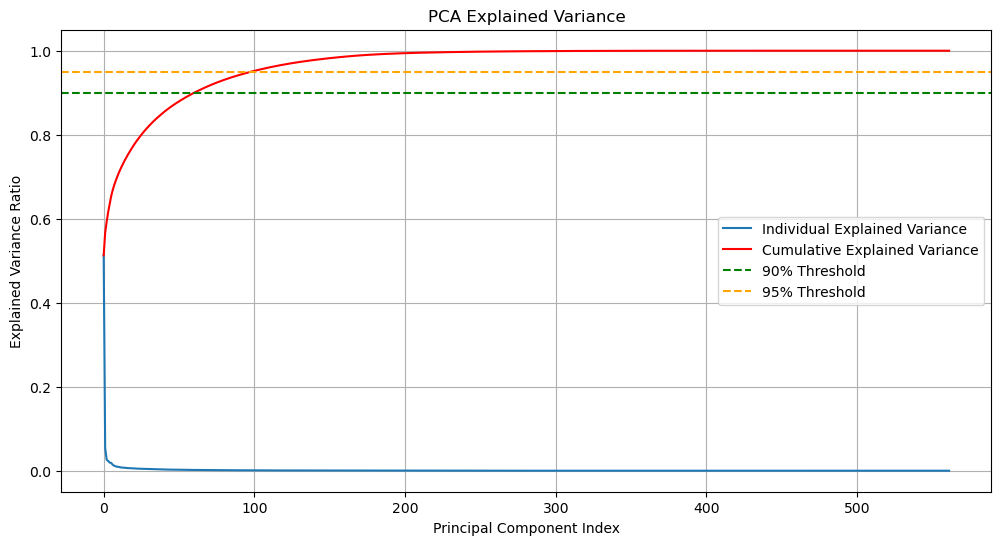

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(explained_var, label='Individual Explained Variance')
plt.plot(cumulative_var, label='Cumulative Explained Variance', color='red')
plt.axhline(0.90, color='green', linestyle='--', label='90% Threshold')
plt.axhline(0.95, color='orange', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

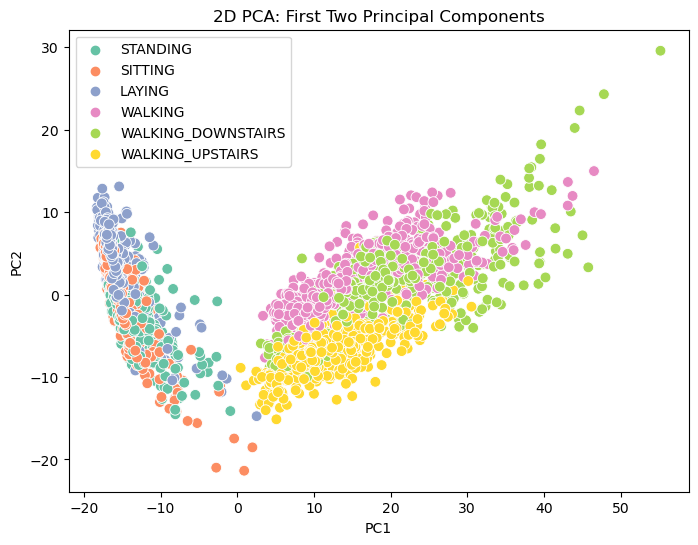

In [16]:
# 2D PCA scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=60)
plt.title('2D PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

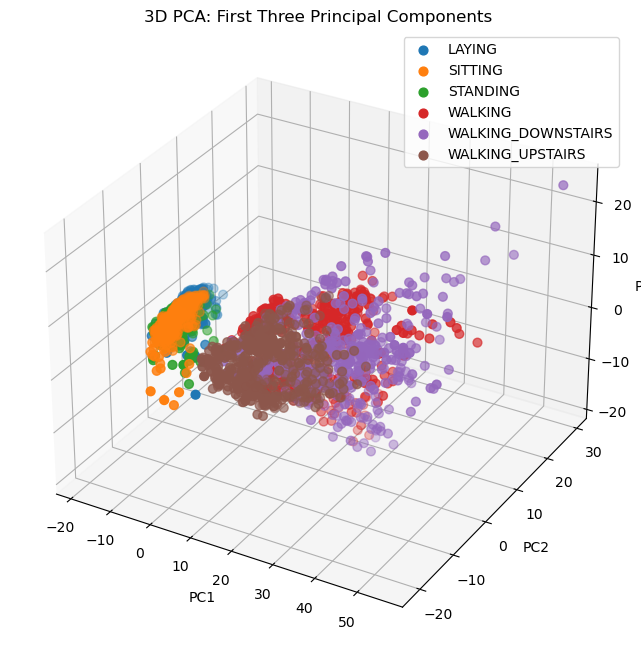

In [17]:
# 3D PCA scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for activity in np.unique(y):
    idx = y == activity
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=activity, s=40)
ax.set_title('3D PCA: First Three Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()